# CME 193 - Lecture 4

- Random numbers and histograms
- Power method walkthrough
- Linear algebra functions


## Random numbers

see [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

In [11]:
import numpy.random as rng
import matplotlib.pyplot as plt

In [4]:
rng.randint(-10,10)

-4

In [5]:
rng.choice?

### Histograms

In [8]:
rng.normal?

In [9]:
x1 = rng.normal(2,3,1000) # 평균이 2이고 분산이 3인 정규분포난수 1000개
x2 = rng.normal(1,5,1000) # 평균이 1이고 분산이 5인 정규분포난수 1000개

In [ ]:
x1

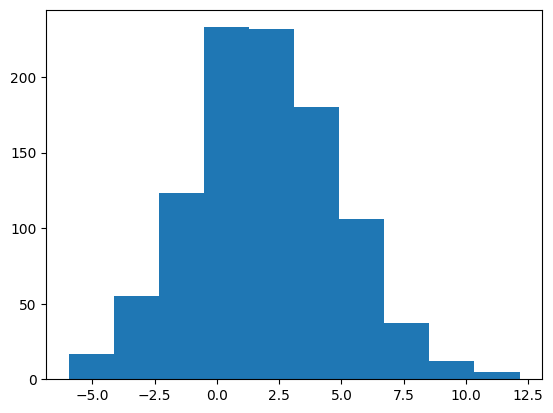

In [12]:
plt.hist(x1);

(array([  9.,  40., 106., 226., 219., 223., 123.,  34.,  17.,   3.]),
 array([-13.36238826, -10.1864513 ,  -7.01051434,  -3.83457738,
         -0.65864042,   2.51729654,   5.6932335 ,   8.86917046,
         12.04510742,  15.22104438,  18.39698134]),
 [<matplotlib.patches.Polygon at 0x7f1bc5f321a0>])

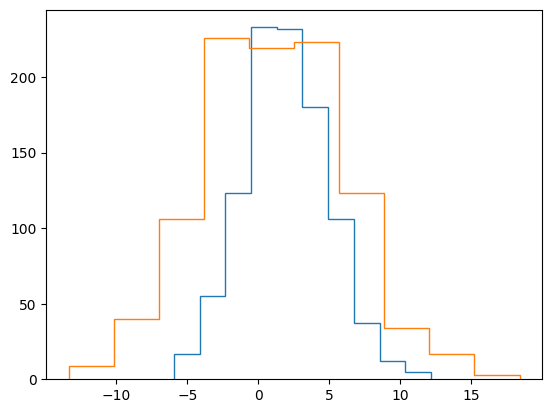

In [13]:
plt.hist(x1,histtype='step')
plt.hist(x2,histtype='step')

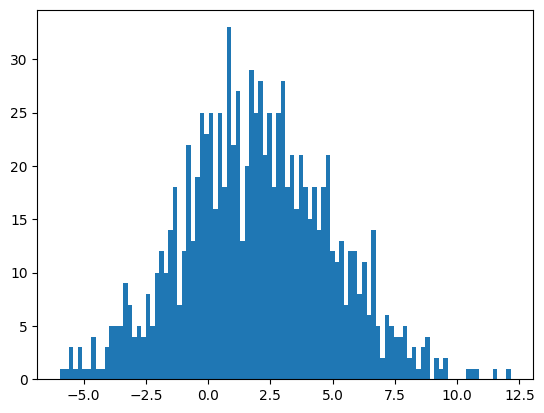

In [14]:
plt.hist(x1,bins=100);

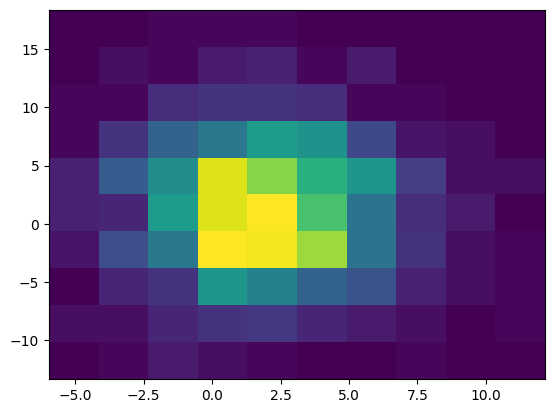

In [15]:
plt.hist2d(x1,x2);

## Power method

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using the power method
* Compare the answer with what you would get from numpy.linalg.eigh

The power method uses iterated matrix-vector multiplication to find the largest magnitude eigenvalue of $A$.  
```
    input) A: an n x n symmetric matrix
    outputs) l: the eigenvalue with the largest absolute value
             v: the corresponding eigenvector

    v <- random vector of length n
    while l has not converged:
        v <- A v
        v <- v / ||v||_2
        l <- v^T A v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

In [16]:
import numpy as np

def compute_largest_eigenvalue(A, epsilon=1e-6, max_iterations=1000):
    n = A.shape[0]
    v = np.random.rand(n)  # Random vector of length n
    
    for _ in range(max_iterations):
        Av = np.dot(A, v)  # Av
        v_new = Av / np.linalg.norm(Av, 2)  # Normalize v
        l = np.dot(v_new, np.dot(A, v_new))  # v^T A v
        
        if np.linalg.norm(v - v_new, 2) < epsilon:  # Check convergence
            break
        
        v = v_new
    
    return l, v

# Example usage
A = np.array([[2, 1, 1], [1, 2, 1], [1, 1, 2]])  # Sample symmetric matrix
l, v = compute_largest_eigenvalue(A)
print("Largest eigenvalue:", l)
print("Corresponding eigenvector:", v)

Largest eigenvalue: 3.9999999999999343
Corresponding eigenvector: [0.57735069 0.57734985 0.57735027]


위의 예시 코드는 주어진 대칭 행렬 A의 가장 큰 절댓값을 가진 고유값과 해당하는 고유벡터를 계산하는 함수 compute_largest_eigenvalue를 구현합니다. epsilon은 수렴 조건으로 사용되는 오차 한계값이며, max_iterations는 최대 반복 횟수를 나타냅니다. 이를 참고하여 대칭 행렬 A에 대한 가장 큰 고유값과 고유벡터를 계산할 수 있습니다.

# Linear Algebra in NumPy

We'll start with 
```python
import numpy.linalg as la
```
`numpy` is the *package*.  `linalg` is a *module* in the package.

In [17]:
import numpy.linalg as la

You can find a full list of available operations/decompositions in [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html)

* `la.eye(3)`, Identity matrix
* `la.trace(A)`, Trace
* `la.column_stack((A,B))`, Stack column wise
* `la.row_stack((A,B,A))`, Stack row wise
* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

SVD (특이값 분해)  
$ A = UΣV^T $

In [18]:
# example of SVD(특이값 분해)

A = np.random.normal(0, 1, (2,3))
U, S, V = la.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

A  = 
 [[-0.72167995  0.22727298 -0.33201694]
 [-0.45573559 -2.08965751 -0.11639108]]
U = 
 [[-0.02746648  0.99962273]
 [ 0.99962273  0.02746648]]
S = 
 [2.14262943 0.82447538]
V = 
 [[-0.20336771 -0.97782262 -0.05004497]
 [-0.89017229  0.20593909 -0.40642637]
 [-0.40771911  0.03810535  0.91231196]]


In [19]:
A = np.arange(0, 4, 1.0).reshape(2,2)
x = np.array([1.0,2.0])
b = A@x 
# x2 <- A \ b
x2 = la.solve(A,b)

print("A = \n",A)
print("x = \n", x)
print("b = \n", b)
print("x2 = \n", x2)

A = 
 [[0. 1.]
 [2. 3.]]
x = 
 [1. 2.]
b = 
 [2. 8.]
x2 = 
 [1. 2.]
